In [135]:
import pandas as pd
import numpy as np

In [7]:
diabetes_recipe = pd.read_csv('diabetes_recipes.csv')

In [45]:
cols_to_clean = ["calories", "carbohydrateContent", "cholesterolContent", "fiberContent", "proteinContent", "sodiumContent", "sugarContent", "fatContent", "saturatedFatContent", "transFatContent"]  

for col in cols_to_clean:
    diabetes_recipe[col] = (
        diabetes_recipe[col]
        .astype(str)                      
        .str.replace(r"[^\d.]", "", regex=True)  
        .replace("", "0")             
        .astype(float)            
    )


In [73]:
macro_total = diabetes_recipe["fatContent"] + diabetes_recipe["carbohydrateContent"] + diabetes_recipe["proteinContent"]

diabetes_recipe["fat_ratio"] = diabetes_recipe["fatContent"] / macro_total
diabetes_recipe["carb_ratio"] = diabetes_recipe["carbohydrateContent"] / macro_total
diabetes_recipe["protein_ratio"] = diabetes_recipe["proteinContent"] / macro_total


In [71]:
trend_diets = pd.read_csv("All_Diets.csv")

In [13]:
random_recipes = pd.read_csv('recipes_api.csv')

In [25]:
print(random_recipes.iloc[10]["description"])

Per 1 bar - Calories: 140kcal | Fat: 4.00g | Carbs: 24.00g | Protein: 2.00g


In [27]:
random_recipes[["serving_size", "calories", "fat", "carbs", "protein"]] = random_recipes["description"].str.extract(
    r"^(.*?)\s*-\s*Calories:\s*(\d+)kcal\s*\|\s*Fat:\s*([\d.]+)g\s*\|\s*Carbs:\s*([\d.]+)g\s*\|\s*Protein:\s*([\d.]+)g")


In [29]:
random_recipes[["calories", "fat", "carbs", "protein"]] = random_recipes[["calories", "fat", "carbs", "protein"]].apply(pd.to_numeric)


In [83]:
macro_total = random_recipes["fat"] + random_recipes["carbs"] + random_recipes["protein"]

random_recipes["fat_ratio"] = random_recipes["fat"] / macro_total
random_recipes["carb_ratio"] = random_recipes["carbs"] / macro_total
random_recipes["protein_ratio"] = random_recipes["protein"] / macro_total


array([[<Axes: title={'center': 'fat_ratio'}>,
        <Axes: title={'center': 'carb_ratio'}>],
       [<Axes: title={'center': 'protein_ratio'}>, <Axes: >]],
      dtype=object)

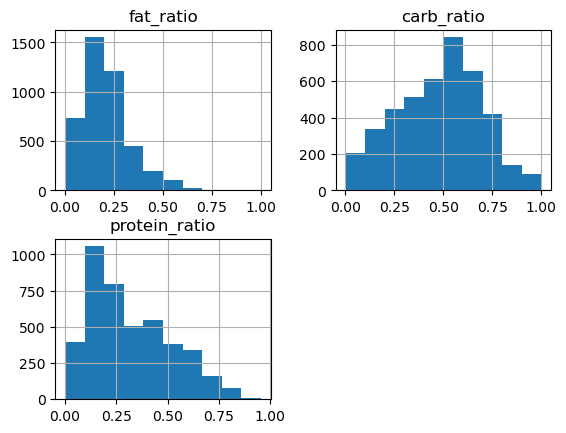

In [91]:
diabetes_recipe[['fat_ratio', 'carb_ratio', 'protein_ratio']].hist()

array([[<Axes: title={'center': 'fat_ratio'}>,
        <Axes: title={'center': 'carb_ratio'}>],
       [<Axes: title={'center': 'protein_ratio'}>, <Axes: >]],
      dtype=object)

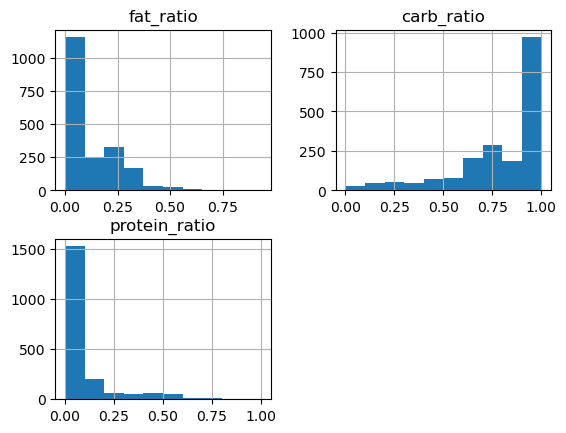

In [93]:
random_recipes[['fat_ratio', 'carb_ratio', 'protein_ratio']].hist()

In [131]:
def compute_macro_ratios(df):

    macro_total = df["fat"] + df["carbs"] + df["protein"]

    macro_total = macro_total.replace(0, np.nan)
    
    df["fat_ratio"] = df["fat"] / macro_total
    df["carb_ratio"] = df["carbs"] / macro_total
    df["protein_ratio"] = df["protein"] / macro_total
    
    return df


In [137]:
vegan = pd.read_csv('vegan.csv')
vegan.rename(columns={"Protein(g)": "protein", "Carbs(g)": "carbs", "Fat(g)": "fat"}, inplace=True)
compute_macro_ratios(vegan)

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,Extraction_day,Extraction_time,fat_ratio,carb_ratio,protein_ratio
0,vegan,Spiked Vegan Eggnog,american,46.36,84.52,42.61,2022-10-16,20:02:29,0.245605,0.487175,0.267220
1,vegan,Vegan Cucumber Tea Sandwiches,american,41.73,143.91,73.88,2022-10-16,20:02:29,0.284679,0.554524,0.160797
2,vegan,Vegan Broccoli Soup Recipe,american,103.83,82.54,139.30,2022-10-16,20:02:29,0.427734,0.253447,0.318820
3,vegan,Baked Vegan Mac and Cheese Recipe,american,140.19,524.38,221.29,2022-10-16,20:02:29,0.249802,0.591945,0.158253
4,vegan,Vegan Nachos,american,73.05,266.38,166.64,2022-10-16,20:02:29,0.329283,0.526370,0.144348
...,...,...,...,...,...,...,...,...,...,...,...
1517,vegan,Vegan Parmesan-Crusted Cauliflower Wings,american,56.28,65.62,90.77,2022-10-16,20:13:40,0.426811,0.308553,0.264635
1518,vegan,Vegan Spice Cake,american,34.40,551.66,193.42,2022-10-16,20:13:40,0.248140,0.707728,0.044132
1519,vegan,Fudgy Vegan Brownies,french,28.65,364.77,168.68,2022-10-16,20:13:40,0.300089,0.648941,0.050970
1520,vegan,Vegan Spinach Pinwheels recipes,american,44.84,59.62,60.33,2022-10-16,20:13:40,0.366102,0.361794,0.272104


In [145]:
paleo = pd.read_csv('paleo.csv')
paleo.rename(columns={"Protein(g)": "protein", "Carbs(g)": "carbs", "Fat(g)": "fat"}, inplace=True)
compute_macro_ratios(paleo)

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,Extraction_day,Extraction_time,fat_ratio,carb_ratio,protein_ratio
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09,0.329557,0.132853,0.537590
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09,0.410148,0.080323,0.509528
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09,0.224887,0.703272,0.071840
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09,0.412210,0.521578,0.066212
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09,0.432405,0.326827,0.240769
...,...,...,...,...,...,...,...,...,...,...,...
1269,paleo,Sunday Slow Cooker: Thai Curry Ground Beef rec...,south east asian,104.82,34.94,32.89,2022-10-16,17:31:24,0.190501,0.202375,0.607124
1270,paleo,Paleo Chicken Nuggets recipes,american,211.64,47.69,100.54,2022-10-16,17:31:24,0.279379,0.132520,0.588101
1271,paleo,Paleo Bacon-Wrapped Cauliflower,american,70.23,224.84,424.27,2022-10-16,17:31:24,0.589805,0.312564,0.097631
1272,paleo,Green Eggs and Bacon,american,28.37,13.96,101.73,2022-10-16,17:31:24,0.706164,0.096904,0.196932


In [147]:
dash = pd.read_csv('dash.csv')
dash.rename(columns={"Protein(g)": "protein", "Carbs(g)": "carbs", "Fat(g)": "fat"}, inplace=True)
compute_macro_ratios(dash)

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,Extraction_day,Extraction_time,fat_ratio,carb_ratio,protein_ratio
0,dash,100-Mile Dash,american,1.90,236.76,1.02,2022-10-16,20:29:20,0.004256,0.987817,0.007927
1,dash,Goulash In A Dash,french,137.31,120.32,35.92,2022-10-16,20:29:20,0.122364,0.409879,0.467757
2,dash,Garlicky Wilted Kale (with a dash of Nutmeg),american,29.41,75.78,47.80,2022-10-16,20:29:20,0.312439,0.495326,0.192235
3,dash,Modern Cocktail No. 2 Recipe,world,0.06,18.81,0.17,2022-10-16,20:29:20,0.008929,0.987920,0.003151
4,dash,Three Dots And A Dash,american,0.51,139.67,0.00,2022-10-16,20:29:20,0.000000,0.996362,0.003638
...,...,...,...,...,...,...,...,...,...,...,...
1740,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44,0.268663,0.564438,0.166898
1741,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44,0.549553,0.209255,0.241192
1742,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44,0.000000,0.975000,0.025000
1743,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44,0.397561,0.365615,0.236824


In [141]:
mediterranean = pd.read_csv('mediterranean.csv')
mediterranean.rename(columns={"Protein(g)": "protein", "Carbs(g)": "carbs", "Fat(g)": "fat"}, inplace=True)
compute_macro_ratios(mediterranean)

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,Extraction_day,Extraction_time,fat_ratio,carb_ratio,protein_ratio
0,mediterranean,Mediterranean Cucumber Tonic,mediterranean,0.25,12.01,0.33,2022-10-16,16:43:14,0.026211,0.953932,0.019857
1,mediterranean,Loup de Mer (Mediterranean Seabass),mediterranean,306.14,43.10,26.55,2022-10-16,16:43:14,0.070651,0.114692,0.814657
2,mediterranean,"Mediterranean Baked Trout with Olives, Fennel ...",mediterranean,187.14,42.31,87.94,2022-10-16,16:43:14,0.277072,0.133306,0.589622
3,mediterranean,Mediterranean Salmon Risotto recipes,nordic,395.50,287.10,291.04,2022-10-16,16:43:14,0.298920,0.294873,0.406208
4,mediterranean,Mediterranean Pita Melts,mediterranean,46.57,139.71,37.70,2022-10-16,16:43:14,0.168319,0.623761,0.207920
...,...,...,...,...,...,...,...,...,...,...,...
1748,mediterranean,Mediterranean Cheese Strata,mediterranean,97.62,128.44,84.26,2022-10-16,16:53:19,0.271526,0.413895,0.314578
1749,mediterranean,Mediterranean-Style Mushrooms,mediterranean,9.30,18.75,28.35,2022-10-16,16:53:19,0.502660,0.332447,0.164894
1750,mediterranean,Mediterranean baked fish,mediterranean,249.18,47.03,49.35,2022-10-16,16:53:19,0.142812,0.136098,0.721090
1751,mediterranean,Mediterranean Spring Salad,mediterranean,39.45,79.50,29.97,2022-10-16,16:53:19,0.201249,0.533844,0.264907


In [103]:
trend_diets.rename(columns={"Protein(g)": "protein", "Carbs(g)": "carbs", "Fat(g)": "fat"}, inplace=True)


In [117]:
keto = pd.read_csv('keto.csv')

In [125]:
keto.rename(columns={"Protein(g)": "protein", "Carbs(g)": "carbs", "Fat(g)": "fat"}, inplace=True)

array([[<Axes: title={'center': 'fat'}>,
        <Axes: title={'center': 'carbs'}>],
       [<Axes: title={'center': 'protein'}>, <Axes: >]], dtype=object)

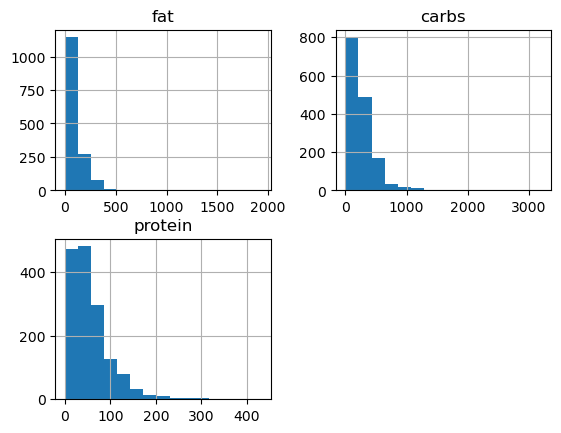

In [173]:
vegan[['fat', 'carbs', 'protein']].hist(bins=15)


In [185]:
diabetes_recipe["ingredient_count"] = diabetes_recipe["ingredients"].str.strip().str.split("\n").apply(len)


In [189]:
import re

def extract_ingredient_names(text):
    lines = text.strip().split("\n")
    ingredients = []
    for i in range(0, len(lines), 2):  # assume quantity is followed by ingredient
        if i + 1 < len(lines):
            ingredient = lines[i + 1].strip()
            ingredients.append(re.sub(r"^[\d\s\.;a-zA-Z]*", "", ingredient))  # clean junk in front
    return ingredients

diabetes_recipe["ingredient_names"] = diabetes_recipe["ingredients"].apply(extract_ingredient_names)


In [191]:
from collections import Counter

all_ingredients = sum(diabetes_recipe["ingredient_names"].tolist(), [])
common_ingredients = Counter(all_ingredients).most_common(10)


In [201]:
from collections import Counter
import re

word_counter = Counter()

for ingredients_text in diabetes_recipe["ingredients"]:
    lines = ingredients_text.strip().split("\n")
    for line in lines:
        clean_line = re.sub(r"[^a-zA-Z\s]", "", line).lower()
        words = clean_line.split()
        word_counter.update(words)

print(word_counter.most_common(200))


[('cup', 9772), ('tsp', 9487), ('tbsp', 6984), ('pepper', 4116), ('and', 2860), ('oil', 2827), ('fresh', 2800), ('chopped', 2734), ('oz', 2718), ('black', 2675), ('or', 2176), ('olive', 2172), ('salt', 2158), ('diced', 2030), ('garlic', 1854), ('sliced', 1805), ('minced', 1789), ('cheese', 1647), ('red', 1643), ('onion', 1573), ('ground', 1548), ('whole', 1468), ('clove', 1337), ('into', 1314), ('chicken', 1311), ('lbs', 1240), ('cut', 1138), ('sauce', 1123), ('green', 1082), ('tomatoes', 1079), ('lemon', 1068), ('cooking', 1014), ('dried', 1007), ('spray', 994), ('divided', 960), ('powder', 958), ('nonstick', 944), ('eggs', 937), ('small', 933), ('bell', 921), ('large', 917), ('juice', 888), ('can', 882), ('onions', 872), ('water', 869), ('peeled', 849), ('vinegar', 819), ('beans', 810), ('drained', 799), ('sodium', 779), ('inch', 737), ('grated', 733), ('white', 703), ('medium', 698), ('shredded', 688), ('finely', 662), ('thinly', 616), ('frozen', 609), ('rinsed', 608), ('yogurt', 59

In [375]:
common_words = {"cup", "cups", "tsp", "teaspoon", "teaspoons", "tbsp", "tablespoon", "tablespoons",
                "oz", "ounce", "ounces", "and", "or", "lbs", "pound", "pounds", "slice", "slices", 
                "fresh", "chopped", "black", "garlic", "whole", "ground", "minced", "sliced", "into",
               "cut", "red", "green", "spray", "dried", "nonstick", "small", "large", "can", "peeled",
               "medium", "white", "inch", "drained", "finely", "shredded", "rinsed", "frozen", "thinly",
               "grated", "powder", "cooking", "diced", "for", "plain", "nonfat", "to", "greek", "med",
               "canned", "use", "freshly", "leaves", "low", "about", "sodium","divided", "cooked", "sauce"
               ,"breasts", "baby", "egg", "optional", "seeds", "light"}

filtered_counter = {word: count for word, count in word_counter.items() if word not in common_words}

top_ingredients = sorted(filtered_counter.items(), key=lambda x: x[1], reverse=True)[:30]
labels, counts = zip(*top_ingredients)



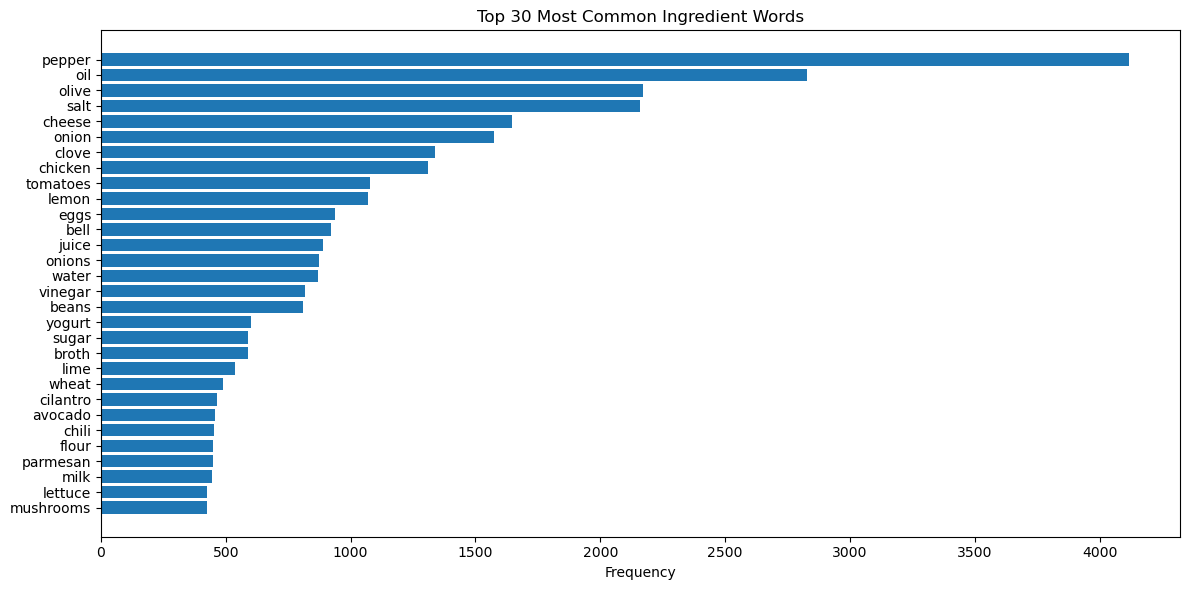

In [377]:
top_n = 30


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(labels[::-1], counts[::-1])  # reverse so most frequent is on top
plt.xlabel("Frequency")
plt.title("Top 30 Most Common Ingredient Words")
plt.tight_layout()
plt.show()


In [205]:
trend_diets

,Diet_type,Recipe_name,Cuisine_type,protein,carbs,fat,Extraction_day,Extraction_time,fat_ratio,carb_ratio,protein_ratio
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09,0.329557,0.132853,0.537590
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09,0.410148,0.080323,0.509528
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09,0.224887,0.703272,0.071840
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09,0.412210,0.521578,0.066212
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09,0.432405,0.326827,0.240769
...,...,...,...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44,0.268663,0.564438,0.166898
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44,0.549553,0.209255,0.241192
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44,0.000000,0.975000,0.025000
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44,0.397561,0.365615,0.236824


In [209]:
pd.crosstab(trend_diets["Diet_type"], trend_diets["Cuisine_type"])


Cuisine_type,american,asian,british,caribbean,central europe,chinese,eastern europe,french,indian,italian,japanese,kosher,mediterranean,mexican,middle eastern,nordic,south american,south east asian,world
Diet_type,,,,,,,,,,,,,,,,,,,
dash,639,24,64,3,9,38,10,150,20,165,9,5,176,61,21,32,54,31,234
keto,663,11,90,7,11,38,11,163,12,234,10,0,89,60,17,35,21,34,6
mediterranean,145,12,4,1,1,1,3,61,3,148,2,0,1274,17,26,31,10,8,6
paleo,535,12,54,6,9,26,27,154,9,171,5,2,106,48,12,45,21,29,3
vegan,925,67,27,1,4,17,4,76,48,81,24,0,99,38,15,9,31,46,10


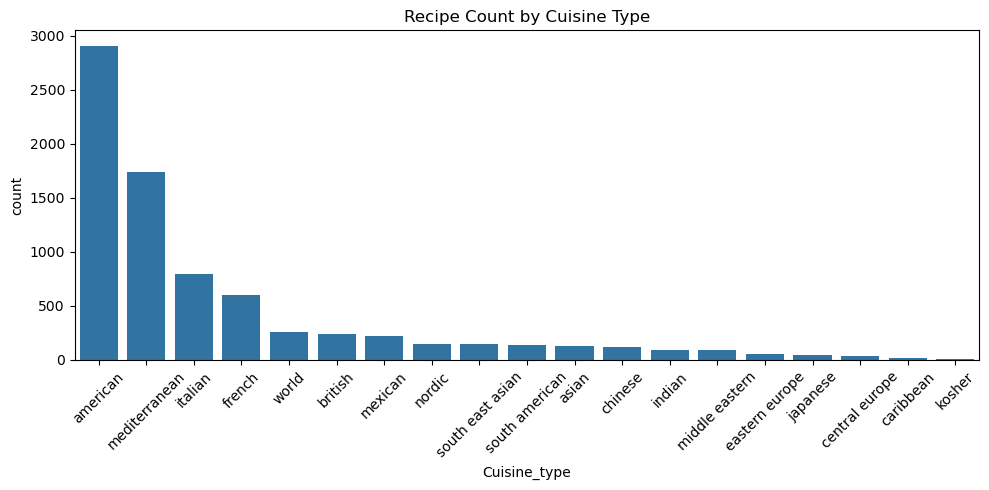

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=trend_diets, x="Cuisine_type", order=trend_diets["Cuisine_type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Recipe Count by Cuisine Type")
plt.tight_layout()
plt.show()


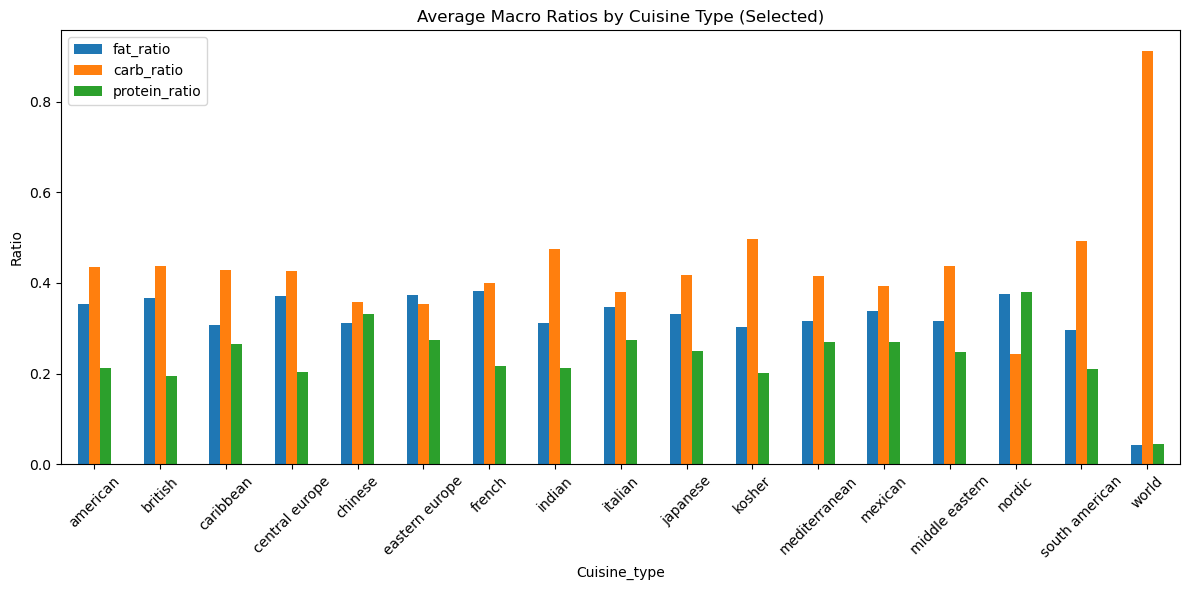

In [221]:

macro_by_cuisine = trend_diets.groupby("Cuisine_type")[["fat_ratio", "carb_ratio", "protein_ratio"]].mean()

macro_by_cuisine = macro_by_cuisine.drop(["asian", "south east asian"], errors="ignore")

macro_by_cuisine.plot(
    kind="bar", figsize=(12, 6), title="Average Macro Ratios by Cuisine Type (Selected)"
)
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [229]:
trend_diets["Calories_est"] = trend_diets["protein"] * 4 + trend_diets["carbs"] * 4 + trend_diets["fat"] * 9



In [233]:
trend_diets["Calories_est"].std()

1670.2663052419646

In [239]:
diabetes_recipe.rename(columns={"proteinContent": "protein", "carbohydrateContent": "carbs", "fatContent": "fat"}, inplace=True)

In [253]:
diabetes_recipe['Diet_type'] = 'diabetes'

In [277]:

df1_selected = diabetes_recipe[["Diet_type","carbs", "fat", "protein","fat_ratio","carb_ratio","protein_ratio"]]
df2_selected = trend_diets[["Diet_type","carbs", "fat", "protein","fat_ratio","carb_ratio","protein_ratio"]]



combined_df = pd.concat([df1_selected, df2_selected], ignore_index=True)


In [287]:
combined_df

,Diet_type,carbs,fat,protein,fat_ratio,carb_ratio,protein_ratio,Diet_type_encoded
0,diabetes,24.00,1.00,14.00,0.025641,0.615385,0.358974,1
1,diabetes,6.00,6.00,14.00,0.230769,0.230769,0.538462,1
2,diabetes,2.00,0.50,15.00,0.028571,0.114286,0.857143,1
3,diabetes,20.00,6.00,3.00,0.206897,0.689655,0.103448,1
4,diabetes,15.00,6.00,10.00,0.193548,0.483871,0.322581,1
...,...,...,...,...,...,...,...,...
12073,dash,288.14,137.15,85.20,0.268663,0.564438,0.166898,0
12074,dash,123.18,323.50,141.98,0.549553,0.209255,0.241192,0
12075,dash,0.39,0.00,0.01,0.000000,0.975000,0.025000,0
12076,dash,239.88,260.84,155.38,0.397561,0.365615,0.236824,0


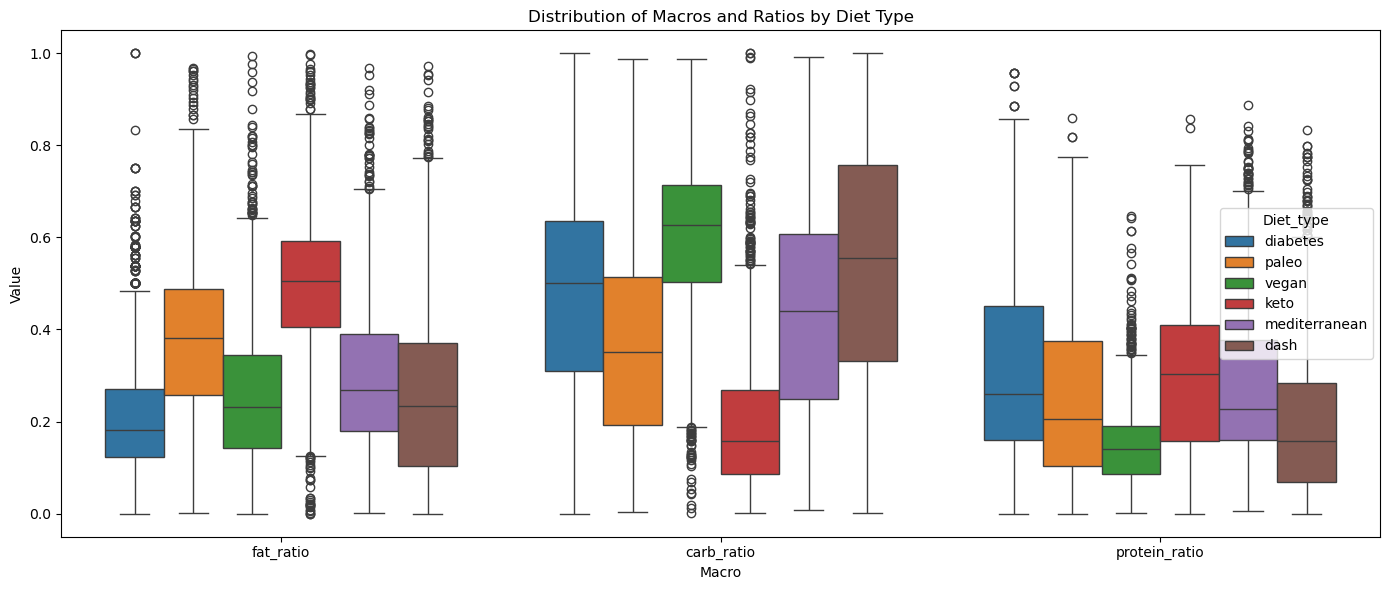

In [299]:
# First, melt the DataFrame
melted = combined_df.melt(
    id_vars="Diet_type",
    value_vars=["fat_ratio", "carb_ratio", "protein_ratio"],
    var_name="Macro",
    value_name="Value"
)
melted

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x="Macro", y="Value", hue="Diet_type")
plt.title("Distribution of Macros and Ratios by Diet Type")
plt.tight_layout()
plt.show()


In [281]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
combined_df["Diet_type_encoded"] = le.fit_transform(combined_df["Diet_type"])


df_onehot = pd.get_dummies(combined_df, columns=["Diet_type"], drop_first=True)
correlations = df_onehot.corr()
correlations

,carbs,fat,protein,fat_ratio,carb_ratio,protein_ratio,Diet_type_encoded,Diet_type_diabetes,Diet_type_keto,Diet_type_mediterranean,Diet_type_paleo,Diet_type_vegan
carbs,1.000000,0.406084,0.298135,-0.121979,0.307782,-0.290547,0.317454,-0.398203,-0.106941,0.123358,0.053635,0.349052
fat,0.406084,1.000000,0.581348,0.521732,-0.323493,-0.092160,0.241444,-0.474075,0.254063,0.085716,0.176905,0.085403
protein,0.298135,0.581348,1.000000,0.142169,-0.367813,0.350854,0.192070,-0.423458,0.203800,0.221193,0.130942,-0.009580
fat_ratio,-0.121979,0.521732,0.142169,1.000000,-0.672942,-0.105519,0.160028,-0.327078,0.433123,0.019664,0.171545,-0.061828
carb_ratio,0.307782,-0.323493,-0.367813,-0.672942,1.000000,-0.664558,-0.008779,0.082332,-0.383613,-0.040257,-0.108396,0.226620
protein_ratio,-0.290547,-0.092160,0.350854,-0.105519,-0.664558,1.000000,-0.149857,0.219729,0.078175,0.034256,-0.027571,-0.242200
Diet_type_encoded,0.317454,0.241444,0.192070,0.160028,-0.008779,-0.149857,1.000000,-0.498428,-0.021363,0.231078,0.404547,0.681727
Diet_type_diabetes,-0.398203,-0.474075,-0.423458,-0.327078,0.082332,0.219729,-0.498428,1.000000,-0.279848,-0.304823,-0.254035,-0.280905
Diet_type_keto,-0.106941,0.254063,0.203800,0.433123,-0.383613,0.078175,-0.021363,-0.279848,1.000000,-0.155871,-0.129901,-0.143641
Diet_type_mediterranean,0.123358,0.085716,0.221193,0.019664,-0.040257,0.034256,0.231078,-0.304823,-0.155871,1.000000,-0.141494,-0.156460


In [283]:
combined_df.groupby("Diet_type")[["carbs", "fat", "protein", "fat_ratio", "carb_ratio", "protein_ratio"]].std()


,carbs,fat,protein,fat_ratio,carb_ratio,protein_ratio
Diet_type,,,,,,
dash,205.980280,133.521284,91.546033,0.194078,0.278850,0.162871
diabetes,11.708132,4.772567,10.585720,0.124408,0.217839,0.198972
keto,78.095127,115.513449,98.874741,0.166572,0.160609,0.167027
mediterranean,165.177028,96.960619,93.881090,0.160783,0.214325,0.162853
paleo,160.716046,134.520176,97.807248,0.175471,0.221506,0.175031
vegan,223.366178,120.350832,47.165943,0.160277,0.171203,0.086088


In [285]:
combined_df.groupby("Diet_type")[["carbs", "fat", "protein", "fat_ratio", "carb_ratio", "protein_ratio"]].median()

,carbs,fat,protein,fat_ratio,carb_ratio,protein_ratio
Diet_type,,,,,,
dash,94.25,59.22,41.380,0.234742,0.555219,0.156626
diabetes,14.00,6.00,9.000,0.181818,0.500000,0.260870
keto,37.66,128.41,72.835,0.505751,0.157348,0.302900
mediterranean,115.96,73.71,73.780,0.268336,0.439382,0.227883
paleo,87.73,106.80,60.595,0.382447,0.351300,0.205532
vegan,201.48,71.74,44.635,0.231518,0.626246,0.139688
